In [37]:
import importlib
import curve_classes_and_functions as yCurve
importlib.reload(yCurve)
import instrument_classes as inst
importlib.reload(inst)
import pandas as pd
import math
import matplotlib.pyplot as plt

### Create a YieldCurve instance
Noting that YieldCurve inherits ZeroCurve
Add a portfolio of bank bills to the yield curve

[(0, -98.76543209876543), (0.25, 100)]
[(0, -97.08737864077669), (0.5, 100)]
([0, 0.25, 0.5], [1.0, 0.9876543209876543, 0.9708737864077669])
[(0, -99.05015286237719), (0.5, 3.0), (1, 103.0)]
[(0, -98.24088881407287), (1.0, 8.0), (2, 108.0)]
[(0, -99.05015286237719), (0.5, 3.0), (1, 103.0), (0, -98.24088881407287), (1.0, 8.0), (2, 108.0), (0, -98.76543209876543), (0.25, 100), (0, -97.08737864077669), (0.5, 100)]
PV of all the cashflows except maturity is:  2.9126213592233006
The bond price is:  99.05015286237719
The last cashflow is:  103.0
PV of all the cashflows except maturity is:  7.46699273810904
The bond price is:  98.24088881407287
The last cashflow is:  108.0
([0, 0.25, 0.5, 1, 2], [1.0, 0.9876543209876543, 0.9708737864077669, 0.93337409226363, 0.8404990377404059])


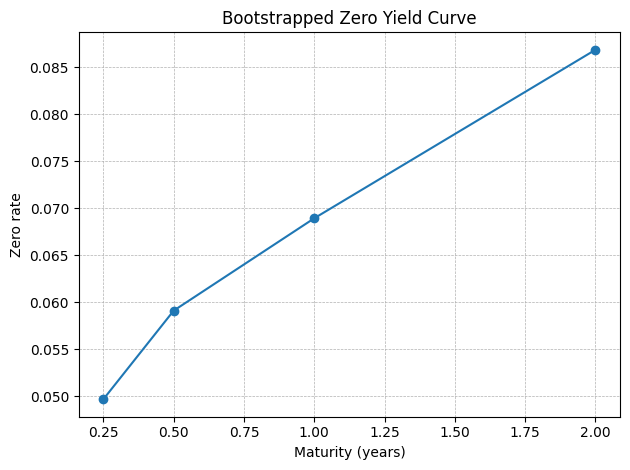

In [38]:


# create a portfolio of two bank_bills
bank_bill_1 = inst.Bank_bill(face_value=100, maturity=.25)
bank_bill_1.set_ytm(.05)
bank_bill_1.set_cash_flows()
print(bank_bill_1.get_cash_flows())
bank_bill_2 = inst.Bank_bill(face_value=100, maturity=.5)
bank_bill_2.set_ytm(.06)
bank_bill_2.set_cash_flows()
print(bank_bill_2.get_cash_flows())
yc_portfolio = inst.Portfolio()
yc_portfolio.add_bank_bill(bank_bill_1)
yc_portfolio.add_bank_bill(bank_bill_2)
# print(yc_portfolio.get_cash_flows())

# create a yield curve based on the bank bill portfolio
yc=yCurve.YieldCurve()
yc.set_constituent_portfolio(yc_portfolio)
yc.bootstrap()
print(yc.get_zero_curve())

# create a bond and add it to the portfolio
bond = inst.Bond(face_value=100, maturity=1, coupon=.06, frequency=2)
bond.set_ytm(.07)
bond.set_cash_flows()
print(bond.get_cash_flows())
bond2 = inst.Bond(face_value=100, maturity=2, coupon=.08, frequency=1)
bond2.set_ytm(.09)
bond2.set_cash_flows()
print(bond2.get_cash_flows())

yc_portfolio.add_bond(bond)
yc_portfolio.add_bond(bond2)
yc_portfolio.set_cash_flows()
print(yc_portfolio.get_cash_flows())

yc2=yCurve.YieldCurve()
yc2.set_constituent_portfolio(yc_portfolio)
yc2.bootstrap()
print(yc2.get_zero_curve())

yc2.create_graph()
    

